In [1]:
from optimizer1 import *
from BRL import p_matrix

(CVXPY) May 01 08:59:51 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 01 08:59:51 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [3]:
import pandas as pd
data = pd.read_excel('./data/data.xlsx', index_col=0)

In [4]:
tests = data.loc[:,1:].values
tests.shape

(120, 10)

In [5]:
import numpy as np
input_volumes = []
output_volumes = []
similarity = []
for test in tests:
    solution = solve(e_T=test, beta=4, gamma=991)
    x = np.zeros(66)
    for i in solution:
        x[i] = solution[i]
    input_volume = I_matrix@x
    output_volume = O_matrix@x
    input_volumes.append(input_volume)
    output_volumes.append(output_volume)

In [6]:
input_volumes

[array([  0.,   0., 534., 515.,   0.,   0.,   0.,   0.]),
 array([  0.,   0., 391., 384.,   0.,   0.,   0.,   0.]),
 array([  0.,   0., 272., 348.,   0.,   0.,   0.,   0.]),
 array([  0.,   0., 240., 338.,   0.,   0.,   0.,   0.]),
 array([  0.,   0., 589., 312.,   0.,   0.,   0.,   0.]),
 array([   0.,    0.,  901., 1659.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 1488., 2691.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2332., 3282.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 3007., 3512.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2779., 3160.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2652., 2932.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2596., 2828.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2413., 2697.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2582., 2787.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2703., 2745.,    0.,    0.,    0.,    0.]),
 array([   0.,    0., 2941., 2782.,    0.,    0., 

In [5]:
similarity

[0.8568853607160719,
 0.8168857612338575,
 0.8440040691881805,
 0.8502534057415956,
 0.82261774114118,
 0.8740521533527028,
 0.8991140601427091,
 0.9074737284280293,
 0.9005253716917354,
 0.8905593091172114,
 0.8575277380287608,
 0.8546294664847881,
 0.8615995550490181,
 0.8782343401153516,
 0.8665865797539631,
 0.8547724432459808,
 0.8458413856716274,
 0.8523175873317859,
 0.842719376694138,
 0.8582479835440403,
 0.8507337299799239,
 0.8622554279999746,
 0.8510333416267478,
 0.8311604352696998,
 0.8547995768324772,
 0.835134356648463,
 0.8004614385230774,
 0.8275881774328635,
 0.8326231145929511,
 0.8714577533819662,
 0.9177777763036509,
 0.9073620771884047,
 0.9098061741888057,
 0.8926837866273538,
 0.8618169649917694,
 0.8557426013058533,
 0.8608112677598455,
 0.8673664296573933,
 0.8663635702062694,
 0.8638847354248586,
 0.8456327687838763,
 0.8488323526025945,
 0.8402160879719094,
 0.8643461983252789,
 0.864051922247276,
 0.8640005960983433,
 0.8563977738909615,
 0.838308130738396

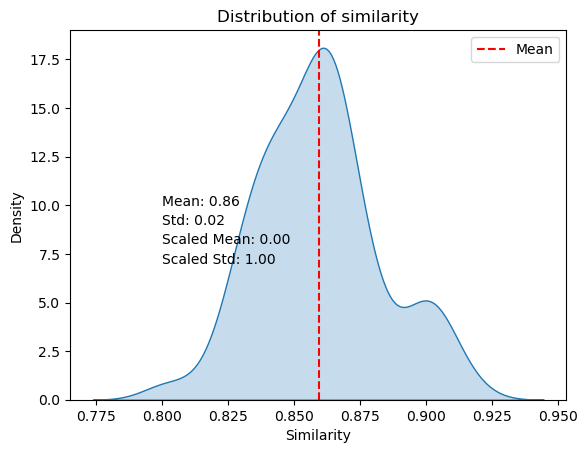

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(similarity, shade=True)

# 평균과 표준편차 계산
mean = np.mean(similarity)
std = np.std(similarity)
scaled = np.array((similarity - mean)/std)
scaled_mean = np.mean(scaled)
scaled_std = np.std(scaled)

# 평균과 표준편차를 나타내는 수직선 그리기
plt.axvline(mean, color='red', linestyle='--', label='Mean')

# 수치 정보 추가
plt.text(0.8, 10, f'Mean: {mean:.2f}')
plt.text(0.8, 9, f'Std: {std:.2f}')
plt.text(0.8, 8, f'Scaled Mean: {scaled_mean:.2f}')
plt.text(0.8, 7, f'Scaled Std: {scaled_std:.2f}')

# 그래프 레이블 설정
plt.xlabel('Similarity')
plt.ylabel('Density')
plt.title('Distribution of similarity')
plt.legend()

# 그래프 보여주기
plt.show()